In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)

In [2]:
df=pd.read_csv(r"spam.tsv", sep='\t')

In [3]:
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,2
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",147,8
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77,2
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,160,6
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,157,6
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,154,2


In [4]:
df.loc[0,'message']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
len(df.loc[0,'message'])

111

In [6]:
df.drop(['length', 'punct'], inplace=True, axis=1)

In [7]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# Checking Null

In [8]:
df.isnull().sum()

label      0
message    0
dtype: int64

# We check for imbalanced data first

In [9]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## Balancing the text data up upsampling

In [10]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [11]:
print(ham.shape, spam.shape)

(4825, 2) (747, 2)


In [12]:
# so we are duplicating the samples from the minority spam class to make the 
#size of tht class similar to that of ham class

spam=spam.sample(n=ham.shape[0], replace=True) # if you are upsampling, then replace must be set to True

# replace=True ---> allows for the row to be sampled more than once

In [13]:
# the index of the spam is now all jumbled up after this sampling

In [14]:
print(ham.shape, spam.shape)

(4825, 2) (4825, 2)


In [15]:
data = pd.concat([ham, spam], ignore_index = True)

In [16]:
data.shape

(9650, 2)

In [17]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives around here though"
4,ham,Even my brother is not like to speak with me. They treat me like aids patent.


In [53]:
data['label'].value_counts()

label
ham     4825
spam    4825
Name: count, dtype: int64

# Encoding the text to categorical discrete numbers

### Typical data preprocessing for text data 

In [18]:
# But before that -- cleaning the data to keep only the root/stem words and removing the punctuation marks
# also converting all the text to one single case so that one word in two diff cases is not considered a diff word

In [19]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer  # tries to find the stem or the root words by deleting the suffixes and the prefixes like 'ing, 'es'. But lametization will give meaningful words as root word but porterstemmer does not give meaningful words.

In [22]:
corpus=[]
for i in range(len(data['message'])):
    cleaned_data= re.sub('[^a-zA-Z]' ," ", data['message'][i])# substituting everything except alphabets from a-z and A-Z with blank space
    cleaned_data=cleaned_data.lower()# turned everything to lower case 
    cleaned_data=cleaned_data.split()# converted the text to list of words by splitting at space (tokenization: split the lowercase string)
    cleaned_data=[word for word in cleaned_data if word not in stopwords.words('english')] # filtered out all the stopwords from our data
    ps = PorterStemmer()
    cleaned_data=[ps.stem(word) for word in cleaned_data]# created the stem words of all the filtered data
    cleaned_data=" ".join(cleaned_data)# joined the list of stemmed words to form a continuous msg string again
    data.loc[i, 'cleaned_msg']=cleaned_data
    corpus.append(cleaned_data)# appendig each msg string to the corpus
    
    
    
    
    

In [23]:
corpus # final text data that can be then used for encoding to numbers for modeling using bag of words approach

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb spell name ye v naughti make v wet',
 'fine way u feel way gota b',
 'serious spell name',
 'go tri month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love',
 'back amp pack

In [24]:
len(corpus)

9650

In [25]:
# to just identify the number of unique words in corpus
total_words=[]
for i in corpus:
    for j in i.split():
        total_words.append(j)
        
len(set(total_words))

6314

In [54]:
data.head()

,label,message,cleaned_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
3,ham,"Nah I don't think he goes to usf, he lives around here though",nah think goe usf live around though
4,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent


In [41]:
# Important

# NB is not considering the order of words in sentence or relation of words, 
# we just count the frequency of individual words to make a bag of words. 


# Bag of Words approach to convert text to number

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
bag_of_words=vectorizer.transform(corpus)

# try giving max_features to CountVectorizer()

In [44]:
bag_of_words.shape

(9650, 6296)

In [45]:
bag_of_words

<9650x6296 sparse matrix of type '<class 'numpy.int64'>'
	with 101019 stored elements in Compressed Sparse Row format>

In [46]:
bag_of_words=bag_of_words.toarray() # for us to vizualize in 2d array

In [47]:
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
vectorizer.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zouk', 'zs', 'zyada'], dtype=object)

In [56]:
len(vectorizer.get_feature_names_out())

6296

In [57]:
data.head()

,label,message,cleaned_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
3,ham,"Nah I don't think he goes to usf, he lives around here though",nah think goe usf live around though
4,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent


In [58]:
data['label']=data['label'].astype('category')
data['label']=data['label'].cat.codes

In [59]:
data.head()

,label,message,cleaned_msg
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives around here though",nah think goe usf live around though
4,0,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent


In [60]:
x=bag_of_words

In [ ]:
# (ham=0, spam=1)

# Word Cloud

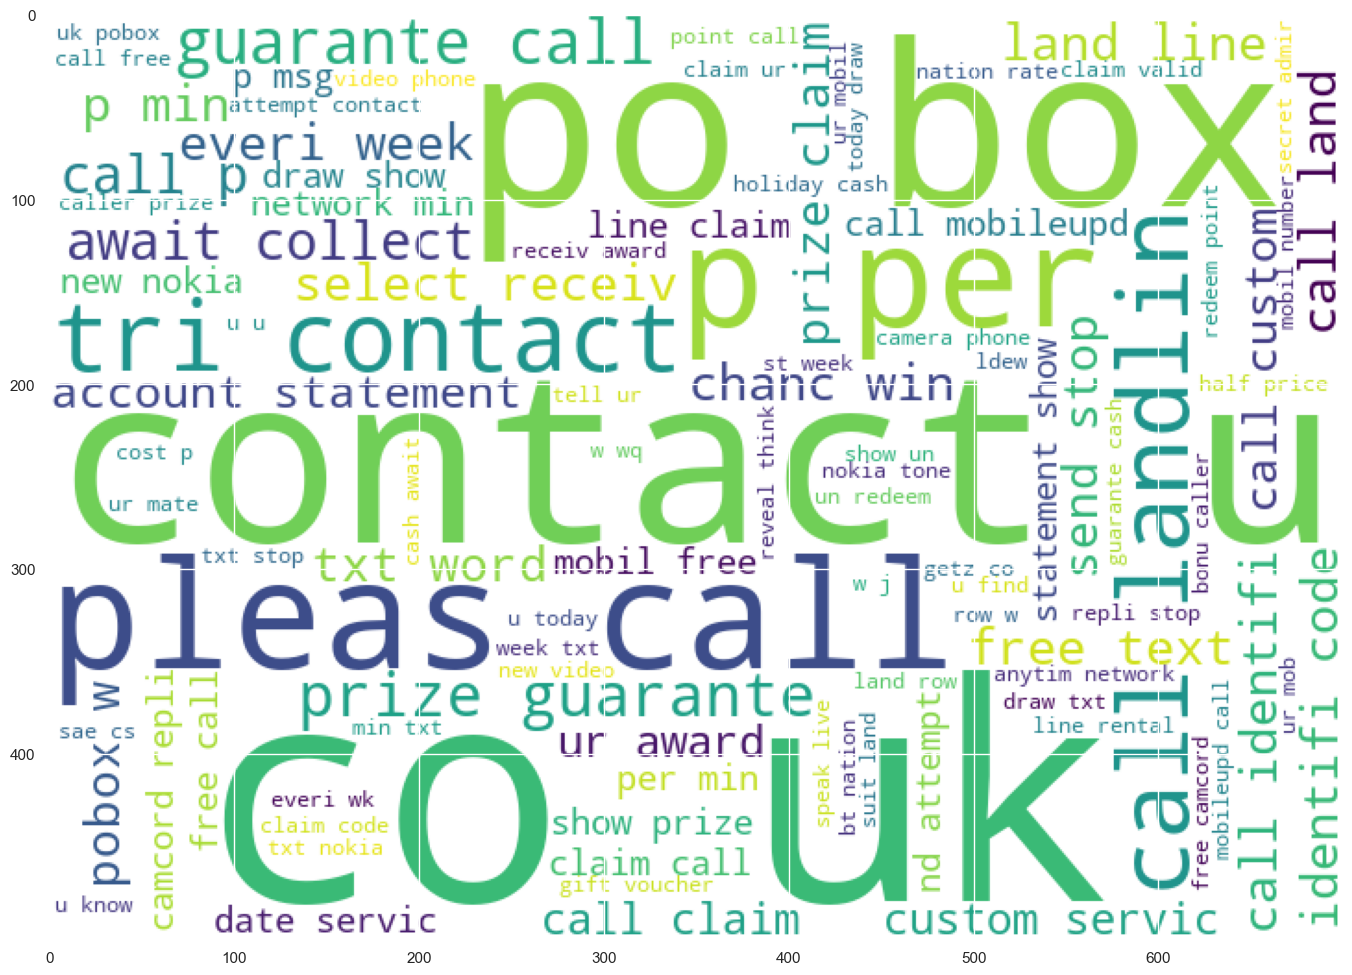

In [107]:
from wordcloud import WordCloud

wc=WordCloud(width=700,height=500,min_font_size=10,background_color='white')

spam_wc=wc.generate(data[data['label']==1]['cleaned_msg'].str.cat(sep=""))

plt.figure(figsize=(18,12))
plt.imshow(spam_wc)
#plt.show()

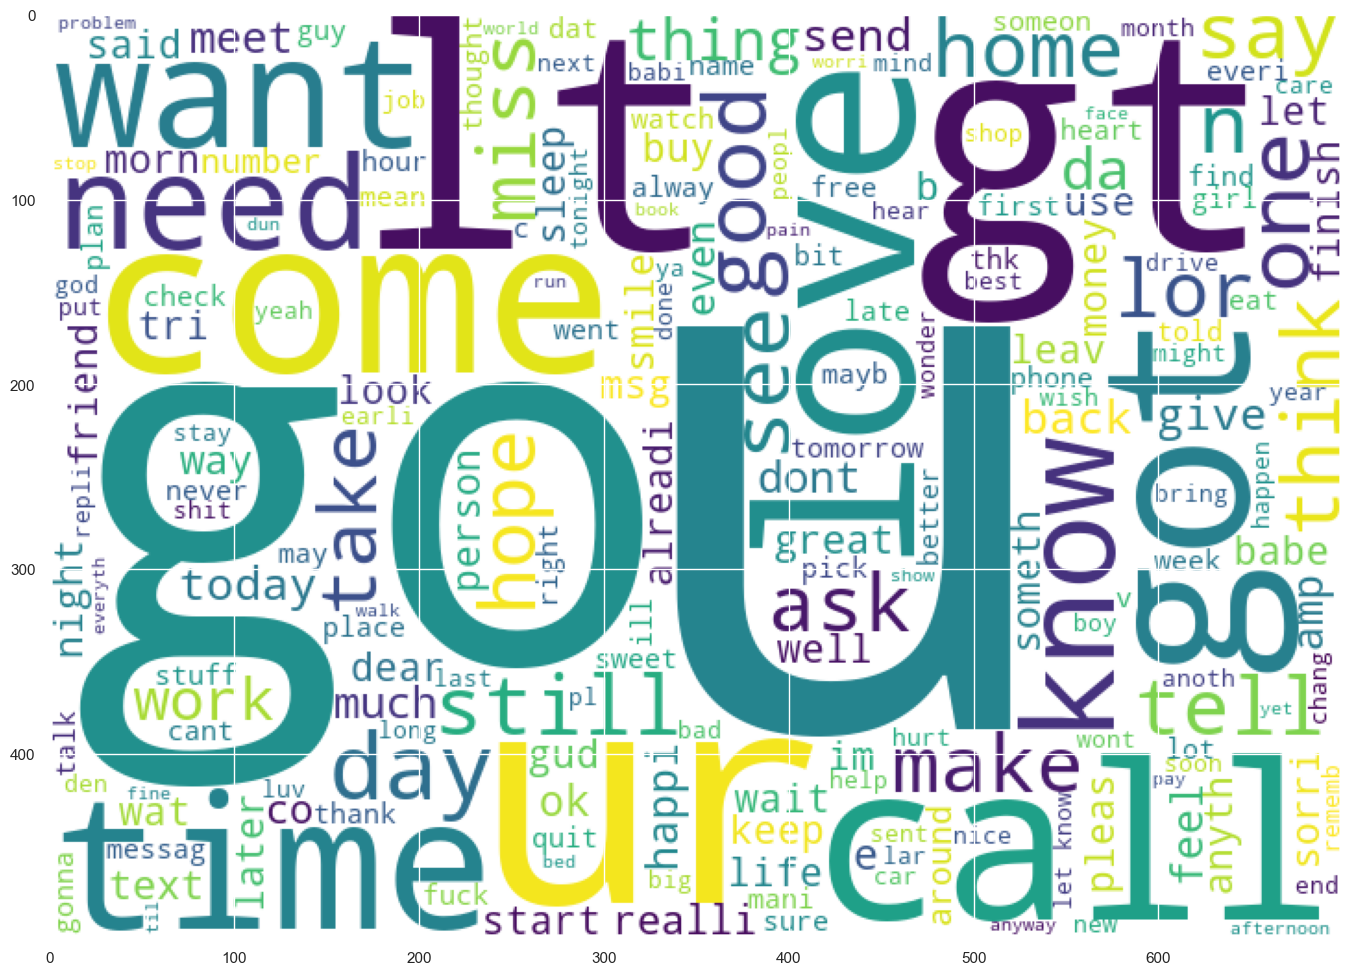

In [108]:
from wordcloud import WordCloud

wc=WordCloud(width=700,height=500,min_font_size=10,background_color='white')

ham_wc=wc.generate(data[data['label']==0]['cleaned_msg'].str.cat(sep=""))

plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

# Bulding the model

In [ ]:
# splitting the data into train and test 

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, data['label'], test_size=0.25, random_state=123)

## Multinomial Naive Bayes model

In [79]:
from sklearn.naive_bayes import MultinomialNB
nb_multi = MultinomialNB()
nb_multi.fit(x_train, y_train)

MultinomialNB()

In [80]:
y_pred_train = nb_multi.predict(x_train)
y_pred_test = nb_multi.predict(x_test)

In [81]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [82]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[3545   84]
 [  36 3572]]

[[1167   29]
 [  18 1199]]


In [83]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9834185435954125

0.9805221715706589


In [84]:
# CrossValidation Accuracy to check generalization


from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(nb_multi, x_train, y_train, cv=5)
test_accuracy = cross_val_score(nb_multi, x_test, y_test, cv=5)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9762324985586485
*******************************************************************************************************************
Test Accuracy after CV : 0.9660171988694449


In [85]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3629
           1       0.98      0.99      0.98      3608

    accuracy                           0.98      7237
   macro avg       0.98      0.98      0.98      7237
weighted avg       0.98      0.98      0.98      7237


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1196
           1       0.98      0.99      0.98      1217

    accuracy                           0.98      2413
   macro avg       0.98      0.98      0.98      2413
weighted avg       0.98      0.98      0.98      2413



## Gaussian Naives Bayes Model

In [86]:
from sklearn.naive_bayes import GaussianNB
nb_gauss = GaussianNB()
nb_gauss.fit(x_train, y_train)

GaussianNB()

In [87]:
y_pred_train = nb_gauss.predict(x_train)
y_pred_test = nb_gauss.predict(x_test)

In [88]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[3225  404]
 [   0 3608]]

[[1036  160]
 [   2 1215]]


In [89]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9441757634378887

0.9328636552009946


In [91]:
# CrossValidation Accuracy to check generalization


from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(nb_gauss, x_train, y_train, cv=5)
test_accuracy = cross_val_score(nb_gauss, x_test, y_test, cv=5)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9135020255281455
*******************************************************************************************************************
Test Accuracy after CV : 0.8997053340549643


In [92]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3629
           1       0.90      1.00      0.95      3608

    accuracy                           0.94      7237
   macro avg       0.95      0.94      0.94      7237
weighted avg       0.95      0.94      0.94      7237


              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1196
           1       0.88      1.00      0.94      1217

    accuracy                           0.93      2413
   macro avg       0.94      0.93      0.93      2413
weighted avg       0.94      0.93      0.93      2413



## Bernoulli Naive Bayes

In [93]:
from sklearn.naive_bayes import BernoulliNB
nb_bern = BernoulliNB()
nb_bern.fit(x_train, y_train)

BernoulliNB()

In [94]:
y_pred_train = nb_bern.predict(x_train)
y_pred_test = nb_bern.predict(x_test)

In [95]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[3625    4]
 [  90 3518]]

[[1193    3]
 [  38 1179]]


In [96]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9870111924830731

0.983008702859511


In [97]:
# CrossValidation Accuracy to check generalization


from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(nb_bern, x_train, y_train, cv=5)
test_accuracy = cross_val_score(nb_bern, x_test, y_test, cv=5)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9843862516083954
*******************************************************************************************************************
Test Accuracy after CV : 0.972237828921935


In [98]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3629
           1       1.00      0.98      0.99      3608

    accuracy                           0.99      7237
   macro avg       0.99      0.99      0.99      7237
weighted avg       0.99      0.99      0.99      7237


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1196
           1       1.00      0.97      0.98      1217

    accuracy                           0.98      2413
   macro avg       0.98      0.98      0.98      2413
weighted avg       0.98      0.98      0.98      2413



# Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf=RandomForestClassifier(max_depth=18, random_state=123)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=18, random_state=123)

In [160]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [161]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9542628160840128

0.9469539991711562


In [162]:
# CrossValidation Accuracy to check generalization


from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=5)
test_accuracy = cross_val_score(rf, x_test, y_test, cv=5)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9546772327581927
*******************************************************************************************************************
Test Accuracy after CV : 0.9457170347843269


In [163]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[3624    5]
 [ 326 3282]]

[[1193    3]
 [ 125 1092]]


In [164]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3629
           1       1.00      0.91      0.95      3608

    accuracy                           0.95      7237
   macro avg       0.96      0.95      0.95      7237
weighted avg       0.96      0.95      0.95      7237


              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1196
           1       1.00      0.90      0.94      1217

    accuracy                           0.95      2413
   macro avg       0.95      0.95      0.95      2413
weighted avg       0.95      0.95      0.95      2413



In [ ]:
#Q) giving the same bag of words preprocessed data to Random Forest as well? is that OK/correct?- yesp its good enough.

# KNN

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
knn_base = KNeighborsClassifier()
knn_base.fit(x_train, y_train)

KNeighborsClassifier()

In [175]:
y_pred_train_knn=knn_base.predict(x_train)
y_pred_test_knn=knn_base.predict(x_test)

In [176]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train_knn))
print("****************"*5)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_knn))

Training Accuracy : 0.9936437750449081
********************************************************************************
Test Accuracy : 0.9792789059262329


In [177]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(knn_base, x_train, y_train, cv=5)
test_accuracy = cross_val_score(knn_base, x_test, y_test, cv=5)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9635227389875032
*******************************************************************************************************************
Test Accuracy after CV : 0.8582656804377894


In [178]:
print(confusion_matrix(y_train, y_pred_train_knn))
print("****************"*5)
print(confusion_matrix(y_test, y_pred_test_knn))


[[3625    4]
 [  42 3566]]
********************************************************************************
[[1192    4]
 [  46 1171]]


In [179]:
print(classification_report(y_train, y_pred_train_knn))
print("****************"*5)
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3629
           1       1.00      0.99      0.99      3608

    accuracy                           0.99      7237
   macro avg       0.99      0.99      0.99      7237
weighted avg       0.99      0.99      0.99      7237

********************************************************************************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1196
           1       1.00      0.96      0.98      1217

    accuracy                           0.98      2413
   macro avg       0.98      0.98      0.98      2413
weighted avg       0.98      0.98      0.98      2413



# Bagging

In [180]:
from sklearn.ensemble import BaggingClassifier

In [181]:
bgg=BaggingClassifier(estimator=knn_base)
bgg.fit(x_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier())

In [182]:
y_pred_train = bgg.predict(x_train)
y_pred_test = bgg.predict(x_test)

In [183]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9897747685505044

0.9759635308744302


In [184]:
# CrossValidation Accuracy to check generalization


from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=5)
test_accuracy = cross_val_score(rf, x_test, y_test, cv=5)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9546772327581927
*******************************************************************************************************************
Test Accuracy after CV : 0.9457170347843269


In [185]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[3628    1]
 [  73 3535]]

[[1194    2]
 [  56 1161]]


In [186]:
print(classification_report(y_train, y_pred_train))
print("****************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3629
           1       1.00      0.98      0.99      3608

    accuracy                           0.99      7237
   macro avg       0.99      0.99      0.99      7237
weighted avg       0.99      0.99      0.99      7237

********************************************************************************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1196
           1       1.00      0.95      0.98      1217

    accuracy                           0.98      2413
   macro avg       0.98      0.98      0.98      2413
weighted avg       0.98      0.98      0.98      2413



# Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression

In [167]:
logit=LogisticRegression(random_state=123)
logit.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [168]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [169]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9972364239325687

0.9925404061334439


In [170]:
# CrossValidation Accuracy to check generalization


from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit, x_train, y_train, cv=5)
test_accuracy = cross_val_score(logit, x_test, y_test, cv=5)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9928142432237397
*******************************************************************************************************************
Test Accuracy after CV : 0.9780366485399862


In [171]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[3625    4]
 [  16 3592]]

[[1186   10]
 [   8 1209]]


In [172]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3629
           1       1.00      1.00      1.00      3608

    accuracy                           1.00      7237
   macro avg       1.00      1.00      1.00      7237
weighted avg       1.00      1.00      1.00      7237


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1196
           1       0.99      0.99      0.99      1217

    accuracy                           0.99      2413
   macro avg       0.99      0.99      0.99      2413
weighted avg       0.99      0.99      0.99      2413



In [ ]:
# Logistic Regression being overfit, Multinomial Naive Bayes algorithm is a better choiec here.

In [ ]:
- By Jeel Raval